In [55]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/noersy/computer_vision.git
  os.chdir('/content')      
except Exception:
  pass

fatal: destination path 'computer_vision' already exists and is not an empty directory.


In [56]:
base_dir = '/content/computer_vision/images'

daun_nangka_dir = os.path.join(base_dir, 'daun_nangka')
daun_sirih_dir = os.path.join(base_dir, 'daun_sirih')

# train_cats_dir = os.path.join(train_dir, 'cats')
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# validation_cats_dir = os.path.join(validation_dir, 'cats')
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [57]:
# Cek penamaan image yang ada di folder daun_nangka_dir dan daun_sirih_dir
print(os.listdir(daun_nangka_dir)[:10])
print(os.listdir(daun_sirih_dir)[:10])

['099.png', '058.png', '075.png', '069.png', '093.png', '090.png', '079.png', '064.png', '087.png', '091.png']
['030.png', '012.png', '034.png', '046.png', '029.png', '038.png', '036.png', '001.png', '028.png', '005.png']


In [58]:
# Cek jumlah data train dan data validation
print('total training daun_nangka images:', len(os.listdir(daun_nangka_dir)))
print('total training daun_sirih images:', len(os.listdir(daun_sirih_dir)))
# print('total validation cat images:', len(os.listdir(validation_cats_dir)))
# print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training daun_nangka images: 50
total training daun_sirih images: 50


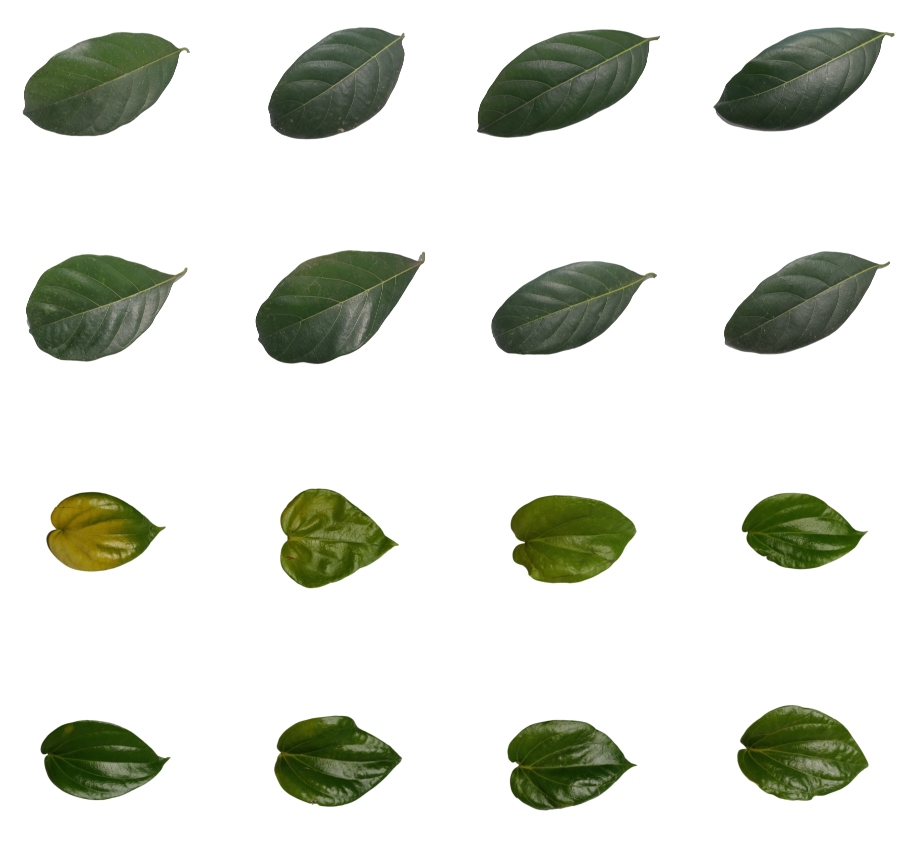

In [59]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_daun_nangka_pix = [os.path.join(daun_nangka_dir, fname) 
                for fname in os.listdir(daun_nangka_dir)[pic_index-8:pic_index]]
next_daun_sirih_pix = [os.path.join(daun_sirih_dir, fname) 
                for fname in os.listdir(daun_sirih_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_daun_nangka_pix+next_daun_sirih_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [60]:
import cv2
import numpy as np

# Gather data daun_nangka
daun_nangka_data = []
daun_nangka_label = []
for r, d, f in os.walk(daun_nangka_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            daun_nangka_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            daun_nangka_label.append(label)

daun_nangka_data = np.array(daun_nangka_data)
daun_nangka_label = np.array(daun_nangka_label)

In [61]:
# Gather data daun_sirih
daun_sirih_data = []
daun_sirih_label = []
for r, d, f in os.walk(daun_sirih_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            daun_sirih_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            daun_sirih_label.append(label)

daun_sirih_data = np.array(daun_sirih_data)
daun_sirih_label = np.array(daun_sirih_label)

<h3>Data Preprocessing</h3>

In [62]:
# Tampilkan shape dari data Daun Nangka dan data Daun Sirih
print("Daun Nangka Data = ", daun_nangka_data.shape)
print("Daun Nangka Label = ", daun_nangka_label.shape)
print("Daun Sirih Data = ", daun_sirih_data.shape)
print("Daun Sirih Label = ", daun_sirih_label.shape)

Daun Nangka Data =  (50, 150, 150, 3)
Daun Nangka Label =  (50,)
Daun Sirih Data =  (50, 150, 150, 3)
Daun Sirih Label =  (50,)


In [63]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", daun_nangka_data[0][0][0])

x_daun_nangka = daun_nangka_data.astype('float32') / 255.0
x_daun_sirih = daun_sirih_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_daun_nangka[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [64]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", daun_nangka_label[995:1005])

lb = LabelEncoder()
y_daun_nangka = lb.fit_transform(daun_nangka_label)
y_daun_sirih = lb.fit_transform(daun_sirih_label)

print("Label setelah di-encoder ", y_daun_nangka[995:1005])

Label sebelum di-encoder  []
Label setelah di-encoder  []


<h3>Definisikan Model</h3>

In [65]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [66]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [67]:
# Tampilkan model summary
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               8640128   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [68]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [69]:
H = model.fit(x_daun_nangka, y_daun_nangka, batch_size=20, epochs=50, validation_data=(x_daun_sirih, y_daun_sirih))

Epoch 1/50
3/3 [==============================] - 1s 145ms/step - loss: 0.0799 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/50
3/3 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 91ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 86ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/50
3/3 [============================

<h3>Evaluasi Model</h3>

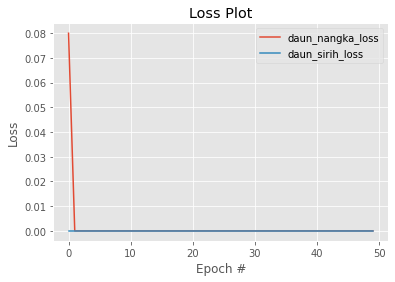

In [70]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="daun_nangka_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="daun_sirih_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

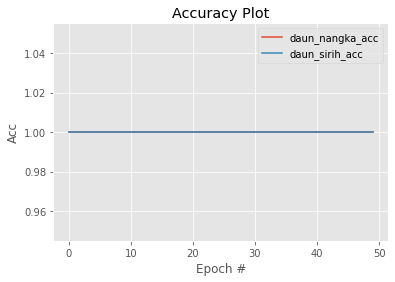

In [71]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="daun_nangka_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="daun_sirih_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import classification_report

pred = model.predict(x_daun_sirih)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_daun_sirih, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

